# 1. 문맥을 이용하여 모델만들기

In [1]:
text = """경마장에 있는 말이 뛰고 있다
그의 말이 법이다
가는 말이 고와야 오는 말이 곱다"""

In [2]:
from keras_preprocessing.text import Tokenizer

In [3]:
t = Tokenizer() # 단어를 숫자로 변환 컴퓨터가 예측한 숫자를 단어로 변환해주는 class
t.fit_on_texts([text]) # list로 입력해야한다.
encoded = t.texts_to_sequences([text])[0]
print(encoded)
print(t.word_index)

[2, 3, 1, 4, 5, 6, 1, 7, 8, 1, 9, 10, 1, 11]
{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [4]:
# 시퀀스만들기
sequences = []
for line in text.split('\n'):
    encoded = t.texts_to_sequences([line])[0]
#    print('원래 문장 :',line)
#    print('encoded 문장 :',encoded)
    for i in range(0,len(encoded)-1):
        for j in range(i+2,len(encoded)+1):
            sequences.append(encoded[i:j])
##############################################################            
print()
for sequence in sequences:
    print('[', end='')
    for word_seq in sequence:
        for key,value in t.word_index.items():
            if value == word_seq:
                print('{}:{}'.format(value,key), end=' ')
    print(']')


[2:경마장에 3:있는 ]
[2:경마장에 3:있는 1:말이 ]
[2:경마장에 3:있는 1:말이 4:뛰고 ]
[2:경마장에 3:있는 1:말이 4:뛰고 5:있다 ]
[3:있는 1:말이 ]
[3:있는 1:말이 4:뛰고 ]
[3:있는 1:말이 4:뛰고 5:있다 ]
[1:말이 4:뛰고 ]
[1:말이 4:뛰고 5:있다 ]
[4:뛰고 5:있다 ]
[6:그의 1:말이 ]
[6:그의 1:말이 7:법이다 ]
[1:말이 7:법이다 ]
[8:가는 1:말이 ]
[8:가는 1:말이 9:고와야 ]
[8:가는 1:말이 9:고와야 10:오는 ]
[8:가는 1:말이 9:고와야 10:오는 1:말이 ]
[8:가는 1:말이 9:고와야 10:오는 1:말이 11:곱다 ]
[1:말이 9:고와야 ]
[1:말이 9:고와야 10:오는 ]
[1:말이 9:고와야 10:오는 1:말이 ]
[1:말이 9:고와야 10:오는 1:말이 11:곱다 ]
[9:고와야 10:오는 ]
[9:고와야 10:오는 1:말이 ]
[9:고와야 10:오는 1:말이 11:곱다 ]
[10:오는 1:말이 ]
[10:오는 1:말이 11:곱다 ]
[1:말이 11:곱다 ]


In [5]:
# sequences에 제일 많은 단어가 들어 있는 개수
maxlen = max([len(s) for s in sequences])
maxlen

6

In [6]:
# sequences를 훈련가능한 데이터로 만들기 
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences = sequences,
                         maxlen = maxlen,
                         padding = 'pre')
sequences

array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  3,  1],
       [ 0,  0,  0,  3,  1,  4],
       [ 0,  0,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  1,  4],
       [ 0,  0,  0,  1,  4,  5],
       [ 0,  0,  0,  0,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11],
       [ 0,  0,  0,  0,  1,  9],
       [ 0,  0,  0,  1,  9, 10],
       [ 0,  0,  1,  9, 10,  1],
       [ 0,  1,  9, 10,  1, 11],
       [ 0,  0,  0,  0,  9, 10],
       [ 0,  0,  0,  9, 10,  1],
       [ 0,  0,  9, 10,  1, 11],
       [ 0,  0,  0,  0, 10,  1],
       [ 0,  0,  0, 10,  1, 11],
       [ 0,  0,  0,  0,  1, 11]])

In [7]:
# 독립변수(X)와 종속변수(Y)로 분리
# 맨 오른쪽 값을 종속변수로
X = sequences[:,:-1]
Y = sequences[:,-1]

In [8]:
vocab_size=len(t.word_index)+1

In [9]:
# 종속변수 원 핫 인코딩
# categorical로 하는 이유는 index와 원 핫 인코딩값이 같게 하기 위함.
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y)
Y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [13]:
# RNN 모델 생성, 학습과정 설정, 학습시키기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,Embedding
# 모델생성
model = Sequential()
# 독립변수 희소행렬로 변환
model.add(Embedding(vocab_size,10,input_length=X.shape[1]))
model.add(SimpleRNN(32))
model.add(Dense(vocab_size,activation='softmax'))
# 모델의 학습과정설정
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# 모델 학습시키기
hist = model.fit(X,Y,epochs=300,verbose=2)

Epoch 1/300
1/1 - 1s - loss: 2.4977 - accuracy: 0.0357
Epoch 2/300
1/1 - 0s - loss: 2.4885 - accuracy: 0.0714
Epoch 3/300
1/1 - 0s - loss: 2.4796 - accuracy: 0.0714
Epoch 4/300
1/1 - 0s - loss: 2.4707 - accuracy: 0.1786
Epoch 5/300
1/1 - 0s - loss: 2.4619 - accuracy: 0.1786
Epoch 6/300
1/1 - 0s - loss: 2.4530 - accuracy: 0.2143
Epoch 7/300
1/1 - 0s - loss: 2.4440 - accuracy: 0.2500
Epoch 8/300
1/1 - 0s - loss: 2.4347 - accuracy: 0.2500
Epoch 9/300
1/1 - 0s - loss: 2.4252 - accuracy: 0.3214
Epoch 10/300
1/1 - 0s - loss: 2.4154 - accuracy: 0.3571
Epoch 11/300
1/1 - 0s - loss: 2.4052 - accuracy: 0.3571
Epoch 12/300
1/1 - 0s - loss: 2.3945 - accuracy: 0.4286
Epoch 13/300
1/1 - 0s - loss: 2.3833 - accuracy: 0.4286
Epoch 14/300
1/1 - 0s - loss: 2.3716 - accuracy: 0.4286
Epoch 15/300
1/1 - 0s - loss: 2.3593 - accuracy: 0.4286
Epoch 16/300
1/1 - 0s - loss: 2.3463 - accuracy: 0.4286
Epoch 17/300
1/1 - 0s - loss: 2.3326 - accuracy: 0.4286
Epoch 18/300
1/1 - 0s - loss: 2.3182 - accuracy: 0.4286
E

Epoch 147/300
1/1 - 0s - loss: 0.7622 - accuracy: 0.7500
Epoch 148/300
1/1 - 0s - loss: 0.7562 - accuracy: 0.7500
Epoch 149/300
1/1 - 0s - loss: 0.7502 - accuracy: 0.7500
Epoch 150/300
1/1 - 0s - loss: 0.7444 - accuracy: 0.7500
Epoch 151/300
1/1 - 0s - loss: 0.7385 - accuracy: 0.7500
Epoch 152/300
1/1 - 0s - loss: 0.7327 - accuracy: 0.7500
Epoch 153/300
1/1 - 0s - loss: 0.7270 - accuracy: 0.7500
Epoch 154/300
1/1 - 0s - loss: 0.7213 - accuracy: 0.7500
Epoch 155/300
1/1 - 0s - loss: 0.7156 - accuracy: 0.7857
Epoch 156/300
1/1 - 0s - loss: 0.7100 - accuracy: 0.7857
Epoch 157/300
1/1 - 0s - loss: 0.7044 - accuracy: 0.7857
Epoch 158/300
1/1 - 0s - loss: 0.6989 - accuracy: 0.7857
Epoch 159/300
1/1 - 0s - loss: 0.6934 - accuracy: 0.7857
Epoch 160/300
1/1 - 0s - loss: 0.6880 - accuracy: 0.7857
Epoch 161/300
1/1 - 0s - loss: 0.6826 - accuracy: 0.7857
Epoch 162/300
1/1 - 0s - loss: 0.6773 - accuracy: 0.7857
Epoch 163/300
1/1 - 0s - loss: 0.6720 - accuracy: 0.7857
Epoch 164/300
1/1 - 0s - loss: 

Epoch 291/300
1/1 - 0s - loss: 0.2962 - accuracy: 0.8929
Epoch 292/300
1/1 - 0s - loss: 0.2951 - accuracy: 0.8929
Epoch 293/300
1/1 - 0s - loss: 0.2940 - accuracy: 0.8929
Epoch 294/300
1/1 - 0s - loss: 0.2929 - accuracy: 0.8929
Epoch 295/300
1/1 - 0s - loss: 0.2918 - accuracy: 0.8929
Epoch 296/300
1/1 - 0s - loss: 0.2907 - accuracy: 0.8929
Epoch 297/300
1/1 - 0s - loss: 0.2897 - accuracy: 0.8929
Epoch 298/300
1/1 - 0s - loss: 0.2887 - accuracy: 0.8929
Epoch 299/300
1/1 - 0s - loss: 0.2877 - accuracy: 0.8929
Epoch 300/300
1/1 - 0s - loss: 0.2867 - accuracy: 0.8929


In [14]:
# 모델 평가
model.evaluate(X,Y)

1/1 [==============================] - 0s 224ms/step - loss: 0.2857 - accuracy: 0.8929


[0.2857123911380768, 0.8928571343421936]

In [15]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

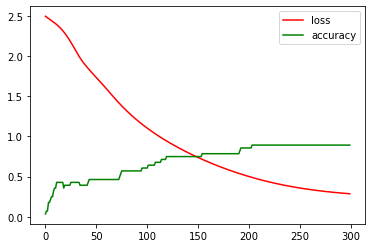

In [18]:
# 학습과정보기
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],color='r',label='loss')
plt.plot(hist.history['accuracy'],color='g',label='accuracy')
plt.legend()
plt.show()

In [30]:
# '경마장에 ' 뒤에 나오는 단어를 model에 의해 추측
encoded = t.texts_to_sequences(['경마장에'])[0]
encoded = pad_sequences([encoded],maxlen=5,padding='pre')
encoded
result = model.predict(encoded)
result = np.argmax(result)
print('예측결과 값 :',result)
for key,value in t.word_index.items():
    if value == result:
        print('예측된 단어 :',key)
        break

예측결과 값 : 3
예측된 단어 : 있는


In [33]:
# 입력받은 문장 뒤에 나오는 단어를  model에 의해 추측
word = input("입력 단어 : ")
encoded = t.texts_to_sequences([word])[0]
encoded = pad_sequences([encoded],maxlen=5,padding='pre')
encoded
result = model.predict(encoded)
result = np.argmax(result)
print('예측결과 값 :',result)
for key,value in t.word_index.items():
    if value == result:
        print('예측된 단어 :',key)
        break

입력 단어 : 가는 말이 고와야
예측결과 값 : 10
예측된 단어 : 오는


In [34]:
# 특정단어 이후 올 수 있는 단어 여러개 예측하기
def sentence_generation(model,t,current_word,n):
    init_word = current_word
    print('입력 단어 :',init_word)
    sentence=''
    for i in range(1,n+1):
        encoded = t.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded],maxlen=5,padding='pre')
        result = np.argmax(model.predict(encoded))
        for word,index in t.word_index.items():
            if index == result:
                print('{}번째 : {} : {}'.format(i,word,result))
                current_word = current_word+ ' ' + word
                break;
    return current_word

In [38]:
sentence_generation(model,t,'말이',5)

입력 단어 : 말이
1번째 : 뛰고 : 4
2번째 : 있다 : 5
3번째 : 말이 : 1
4번째 : 곱다 : 11
5번째 : 있다 : 5


'말이 뛰고 있다 말이 곱다 있다'

# 3.LSTM

In [39]:
# LSTM은 RNN의 히든 state에 cell-state를 추가한 구조. 
# LSTM 모델 생성, 학습과정 설정, 학습시키기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,Embedding,LSTM
# 모델생성
model = Sequential()
# 독립변수 희소행렬로 변환
model.add(Embedding(vocab_size,10,input_length=X.shape[1]))
model.add(LSTM(32))
model.add(Dense(vocab_size,activation='softmax'))
# 모델의 학습과정설정
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# 모델 학습시키기
hist = model.fit(X,Y,epochs=300,verbose=2)

Epoch 1/300
1/1 - 2s - loss: 2.4843 - accuracy: 0.0000e+00
Epoch 2/300
1/1 - 0s - loss: 2.4812 - accuracy: 0.1071
Epoch 3/300
1/1 - 0s - loss: 2.4782 - accuracy: 0.3929
Epoch 4/300
1/1 - 0s - loss: 2.4752 - accuracy: 0.3571
Epoch 5/300
1/1 - 0s - loss: 2.4721 - accuracy: 0.3571
Epoch 6/300
1/1 - 0s - loss: 2.4690 - accuracy: 0.3571
Epoch 7/300
1/1 - 0s - loss: 2.4659 - accuracy: 0.3571
Epoch 8/300
1/1 - 0s - loss: 2.4627 - accuracy: 0.3571
Epoch 9/300
1/1 - 0s - loss: 2.4594 - accuracy: 0.3571
Epoch 10/300
1/1 - 0s - loss: 2.4561 - accuracy: 0.3214
Epoch 11/300
1/1 - 0s - loss: 2.4526 - accuracy: 0.3214
Epoch 12/300
1/1 - 0s - loss: 2.4490 - accuracy: 0.3214
Epoch 13/300
1/1 - 0s - loss: 2.4453 - accuracy: 0.3214
Epoch 14/300
1/1 - 0s - loss: 2.4414 - accuracy: 0.2857
Epoch 15/300
1/1 - 0s - loss: 2.4373 - accuracy: 0.2857
Epoch 16/300
1/1 - 0s - loss: 2.4331 - accuracy: 0.2857
Epoch 17/300
1/1 - 0s - loss: 2.4287 - accuracy: 0.2857
Epoch 18/300
1/1 - 0s - loss: 2.4240 - accuracy: 0.28

Epoch 147/300
1/1 - 0s - loss: 1.5176 - accuracy: 0.4643
Epoch 148/300
1/1 - 0s - loss: 1.5097 - accuracy: 0.4643
Epoch 149/300
1/1 - 0s - loss: 1.5017 - accuracy: 0.4643
Epoch 150/300
1/1 - 0s - loss: 1.4936 - accuracy: 0.4643
Epoch 151/300
1/1 - 0s - loss: 1.4853 - accuracy: 0.5000
Epoch 152/300
1/1 - 0s - loss: 1.4769 - accuracy: 0.5000
Epoch 153/300
1/1 - 0s - loss: 1.4683 - accuracy: 0.5000
Epoch 154/300
1/1 - 0s - loss: 1.4596 - accuracy: 0.5000
Epoch 155/300
1/1 - 0s - loss: 1.4507 - accuracy: 0.5000
Epoch 156/300
1/1 - 0s - loss: 1.4417 - accuracy: 0.5000
Epoch 157/300
1/1 - 0s - loss: 1.4325 - accuracy: 0.5000
Epoch 158/300
1/1 - 0s - loss: 1.4232 - accuracy: 0.5000
Epoch 159/300
1/1 - 0s - loss: 1.4137 - accuracy: 0.5000
Epoch 160/300
1/1 - 0s - loss: 1.4040 - accuracy: 0.5000
Epoch 161/300
1/1 - 0s - loss: 1.3942 - accuracy: 0.5000
Epoch 162/300
1/1 - 0s - loss: 1.3842 - accuracy: 0.5000
Epoch 163/300
1/1 - 0s - loss: 1.3741 - accuracy: 0.5000
Epoch 164/300
1/1 - 0s - loss: 

Epoch 291/300
1/1 - 0s - loss: 0.4123 - accuracy: 0.8929
Epoch 292/300
1/1 - 0s - loss: 0.4096 - accuracy: 0.8929
Epoch 293/300
1/1 - 0s - loss: 0.4069 - accuracy: 0.8929
Epoch 294/300
1/1 - 0s - loss: 0.4043 - accuracy: 0.8929
Epoch 295/300
1/1 - 0s - loss: 0.4017 - accuracy: 0.8929
Epoch 296/300
1/1 - 0s - loss: 0.3991 - accuracy: 0.8929
Epoch 297/300
1/1 - 0s - loss: 0.3965 - accuracy: 0.8929
Epoch 298/300
1/1 - 0s - loss: 0.3939 - accuracy: 0.8929
Epoch 299/300
1/1 - 0s - loss: 0.3914 - accuracy: 0.8929
Epoch 300/300
1/1 - 0s - loss: 0.3889 - accuracy: 0.8929


In [40]:
## GRU - LSTM보다 속도가 약간 빠름.
# RNN 모델 생성, 학습과정 설정, 학습시키기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,Embedding,GRU
# 모델생성
model = Sequential()
# 독립변수 희소행렬로 변환
model.add(Embedding(vocab_size,10,input_length=X.shape[1]))
model.add(GRU(32))
model.add(Dense(vocab_size,activation='softmax'))
# 모델의 학습과정설정
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# 모델 학습시키기
hist = model.fit(X,Y,epochs=300,verbose=2)

Epoch 1/300
1/1 - 2s - loss: 2.4823 - accuracy: 0.1071
Epoch 2/300
1/1 - 0s - loss: 2.4779 - accuracy: 0.2143
Epoch 3/300
1/1 - 0s - loss: 2.4734 - accuracy: 0.2500
Epoch 4/300
1/1 - 0s - loss: 2.4690 - accuracy: 0.2500
Epoch 5/300
1/1 - 0s - loss: 2.4644 - accuracy: 0.2857
Epoch 6/300
1/1 - 0s - loss: 2.4598 - accuracy: 0.2857
Epoch 7/300
1/1 - 0s - loss: 2.4551 - accuracy: 0.2857
Epoch 8/300
1/1 - 0s - loss: 2.4503 - accuracy: 0.2857
Epoch 9/300
1/1 - 0s - loss: 2.4454 - accuracy: 0.2857
Epoch 10/300
1/1 - 0s - loss: 2.4403 - accuracy: 0.2857
Epoch 11/300
1/1 - 0s - loss: 2.4351 - accuracy: 0.2857
Epoch 12/300
1/1 - 0s - loss: 2.4297 - accuracy: 0.2857
Epoch 13/300
1/1 - 0s - loss: 2.4242 - accuracy: 0.2857
Epoch 14/300
1/1 - 0s - loss: 2.4184 - accuracy: 0.2857
Epoch 15/300
1/1 - 0s - loss: 2.4124 - accuracy: 0.2857
Epoch 16/300
1/1 - 0s - loss: 2.4061 - accuracy: 0.2857
Epoch 17/300
1/1 - 0s - loss: 2.3996 - accuracy: 0.2857
Epoch 18/300
1/1 - 0s - loss: 2.3928 - accuracy: 0.2857
E

Epoch 147/300
1/1 - 0s - loss: 0.9487 - accuracy: 0.6429
Epoch 148/300
1/1 - 0s - loss: 0.9404 - accuracy: 0.6429
Epoch 149/300
1/1 - 0s - loss: 0.9323 - accuracy: 0.6429
Epoch 150/300
1/1 - 0s - loss: 0.9244 - accuracy: 0.6429
Epoch 151/300
1/1 - 0s - loss: 0.9167 - accuracy: 0.6429
Epoch 152/300
1/1 - 0s - loss: 0.9091 - accuracy: 0.6429
Epoch 153/300
1/1 - 0s - loss: 0.9017 - accuracy: 0.6429
Epoch 154/300
1/1 - 0s - loss: 0.8944 - accuracy: 0.6429
Epoch 155/300
1/1 - 0s - loss: 0.8873 - accuracy: 0.6429
Epoch 156/300
1/1 - 0s - loss: 0.8803 - accuracy: 0.6786
Epoch 157/300
1/1 - 0s - loss: 0.8734 - accuracy: 0.6786
Epoch 158/300
1/1 - 0s - loss: 0.8666 - accuracy: 0.6786
Epoch 159/300
1/1 - 0s - loss: 0.8599 - accuracy: 0.6786
Epoch 160/300
1/1 - 0s - loss: 0.8533 - accuracy: 0.6786
Epoch 161/300
1/1 - 0s - loss: 0.8469 - accuracy: 0.6786
Epoch 162/300
1/1 - 0s - loss: 0.8405 - accuracy: 0.6786
Epoch 163/300
1/1 - 0s - loss: 0.8342 - accuracy: 0.6786
Epoch 164/300
1/1 - 0s - loss: 

Epoch 291/300
1/1 - 0s - loss: 0.3751 - accuracy: 0.8571
Epoch 292/300
1/1 - 0s - loss: 0.3732 - accuracy: 0.8571
Epoch 293/300
1/1 - 0s - loss: 0.3713 - accuracy: 0.8571
Epoch 294/300
1/1 - 0s - loss: 0.3694 - accuracy: 0.8571
Epoch 295/300
1/1 - 0s - loss: 0.3676 - accuracy: 0.8571
Epoch 296/300
1/1 - 0s - loss: 0.3658 - accuracy: 0.8571
Epoch 297/300
1/1 - 0s - loss: 0.3640 - accuracy: 0.8571
Epoch 298/300
1/1 - 0s - loss: 0.3622 - accuracy: 0.8571
Epoch 299/300
1/1 - 0s - loss: 0.3605 - accuracy: 0.8571
Epoch 300/300
1/1 - 0s - loss: 0.3588 - accuracy: 0.8571
